# **Computer Vision on Dogs vs Cats**

# ***Training a convnet from scratch on a small dataset***

##**Data Extraction**

In [ ]:
import os
from google3.pyglib import gfile
import shutil
import zipfile

In [ ]:
# Path to the original zip directory where the images reside
original_dataset_zip = '/x20/users/ad/aditr/dogs-vs-cats.zip'

# Extracting the data
local_dataset_zip = '/tmp/dogs_vs_cats.zip'
gfile.Copy(original_dataset_zip, local_dataset_zip)
zip_ref = zipfile.ZipFile(local_dataset_zip, 'r')
zip_ref.extractall('/tmp')

We now have the following directories in tmp:


*   train.zip
*   test1.zip
*   dogs_vs_cats.zip

We need to extract train.zip now

In [ ]:
train_dataset_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(train_dataset_zip, 'r')
zip_ref.extractall('/tmp')

We now have the following directories in tmp:

*   train.zip
*   test1.zip
*   dogs_vs_cats.zip
*   train

The train directory is the one that has all the 25,000 images we are intersted in.

In [ ]:
original_train_dataset_dir = '/tmp/train'

In [ ]:
print('Total training cat & dog images:', len(os.listdir(original_train_dataset_dir)))

Total training cat & dog images: 25000


Let us now make a directory in tmp that will store the smaller dataset we will work with.

In [ ]:
base_dir = '/tmp/cats_and_dogs_small'
os.mkdir(base_dir)

We now have the following directories in tmp:

*   train.zip
*   test1.zip
*   dogs_vs_cats.zip
*   train
*   cats_and_dogs_small

Let us now make sub-directories in cats_and_dogs_small for the training, validation & test splits

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

Now, we will create 2 sub_directories for cats & dogs in each of the train, validation & test directories

In [ ]:
# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Directory stucture:


*   cats_and_dogs_small
    * train
        * cats    
        * dogs
    * validation
        * cats
        * dogs
    * test
        * cats
        * dogs


Let us now populate these directories.

We will use 2000 images for training and 1000 images each for validation and test sets.

First we will copy the cat images

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_train_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_train_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_train_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

Then we will copy the dog images

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_train_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_train_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_train_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Let us now a delete the train directory so as to save memory for our models we will build

In [ ]:
shutil.rmtree('/tmp/train/')

## **Data Preprocessing**

Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:


1.   Read the picture files.
2.   Decode the JPEG content to RGB grids of pixels.
3.   Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval


Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. 

In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files
on disk into batches of preprocessed tensors. 

This is what we’ll use here.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(150, 150),
          batch_size=20,
          class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=20,
          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(150, 150),
          batch_size=20,
          class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=20,
          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## **Building Our Network**

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Configuring the model for training

In [ ]:
from keras import optimizers
import tensorflow as tf

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Fitting the model using a batch genrator

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 5s 36ms/step - loss: 0.6912 - acc: 0.5300 - val_loss: 0.6730 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 4s 35ms/step - loss: 0.6649 - acc: 0.5970 - val_loss: 0.6437 - val_acc: 0.6220
Epoch 3/30
100/100 [==============================] - 4s 36ms/step - loss: 0.6277 - acc: 0.6560 - val_loss: 0.6268 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 3s 35ms/step - loss: 0.5857 - acc: 0.6860 - val_loss: 0.6136 - val_acc: 0.6540
Epoch 5/30
100/100 [==============================] - 3s 34ms/step - loss: 0.5575 - acc: 0.7090 - val_loss: 0.6001 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 4s 37ms/step - loss: 0.5205 - acc: 0.7435 - val_loss: 0.6013 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 4s 43ms/step - loss: 0.5013 - acc: 0.7500 - val_loss: 0.5907 - val_acc: 0.6810
Epoch 8/30
100/100 [==============================] - 4s 42ms/step - 

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_gpu_aditr.kernel.aditr.1836721356237.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/keras/engine/training.py:1976: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


## Saving the model

In [ ]:
model.save('cats_and_dogs_small_1.h5')

## Displaying curves of loss and accuracy during training

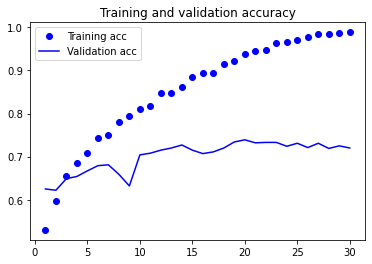

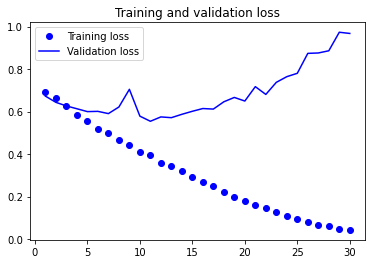

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

## **Using Data Augmentation**

Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. 

***Data augmentation*** takes the approach of generating more training data
from existing training samples, by augmenting the samples via a number of random
transformations that yield believable-looking images. The goal is that at training time, our model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

Example of data augmentation. 

In Keras, this can be done by configuring a number of random transformations to
be performed on the images read by the ImageDataGenerator instance.

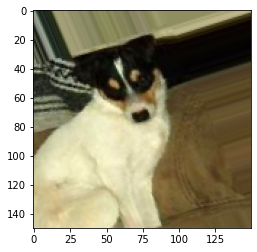

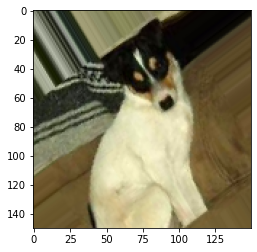

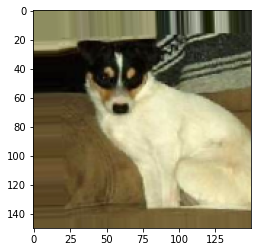

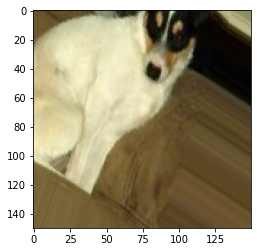

In [ ]:
# Setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


#  Displaying some randomly augmented training images
from keras.preprocessing import image

fnames = [os.path.join(train_dogs_dir, fname) for
      fname in os.listdir(train_dogs_dir)]

img_path = fnames[3]    # Randomly chosen image to transform

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

If we train a new model using only data augmentation, it may not be enough as eventhough the images are differnt, they are still very very similar. 

Therfore, to further avoid overfitting, we will also add a Dropout layer.

### Defining a new convnet that includes dropout

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### Training the convnet using data-augmentaion generators

In [ ]:
train_datagen = ImageDataGenerator(
          rescale=1./255,
          rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)     # Validation data shouldn't be augmented

train_generator = train_datagen.flow_from_directory(
          train_dir,                # Target directory
          target_size=(150, 150),   # Resizes all input image to 150 x 150
          batch_size=20,
          class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=20,
          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch=100,
          epochs=100,
          validation_data=validation_generator,
          validation_steps=50)

Epoch 1/100
100/100 [==============================] - 11s 105ms/step - loss: 0.6943 - acc: 0.5120 - val_loss: 0.6870 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 11s 107ms/step - loss: 0.6867 - acc: 0.5375 - val_loss: 0.6712 - val_acc: 0.5760
Epoch 3/100
100/100 [==============================] - 10s 104ms/step - loss: 0.6739 - acc: 0.5645 - val_loss: 0.6845 - val_acc: 0.5410
Epoch 4/100
100/100 [==============================] - 10s 105ms/step - loss: 0.6631 - acc: 0.5815 - val_loss: 0.6367 - val_acc: 0.6200
Epoch 5/100
100/100 [==============================] - 10s 103ms/step - loss: 0.6480 - acc: 0.6125 - val_loss: 0.6290 - val_acc: 0.6300
Epoch 6/100
100/100 [==============================] - 11s 106ms/step - loss: 0.6452 - acc: 0.6215 - val_loss: 0.6129 - val_acc: 0.6640
Epoch 7/100
100/100 [==============================] - 11s 110ms/step - loss: 0.6241 - acc: 0.6410 - val_loss: 0.6141 - val_acc: 0.6390
Epoch 8/100
100/100 [===========================

### Saving the model

In [ ]:
model.save('cats_and_dogs_small_2.h5')

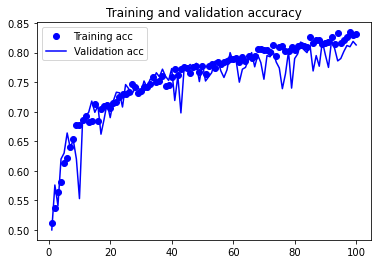

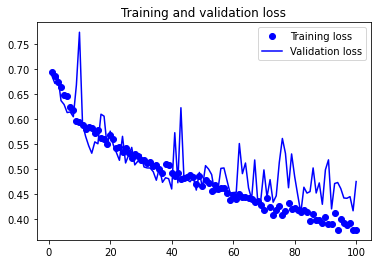

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Because of data augmentation and dropout, we are no longer overfitting. Both the training and calidation curves closely follow each other.

We also can now reach an accuracy of **82%**: a relative 10% improvement!

#### As a next step to improve our model, we will use a pretrained convenet

#***Using a Pretrained Convnet***

Let us use a convnet trained on the ImageNet dataset (1.4 million labeled images and 1,000 different classes). 

ImageNet contains many animal classes, including different species of cats and dogs, and we can thus expect to perform well on the dogs-versus-cats classification problem

We’ll use the VGG16 architecture, developed by Karen Simonyan and Andrew
Zisserman in 2014; it’s a simple and widely used convnet architecture for ImageNet.

There are two ways to use a pretrained network: **feature extraction** and **fine-tuning**. Let's get started with feature extraction.

## **Feature Extraction**

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

 As you saw in our previous model, convnets used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely connected classifier. The first part is called the convolutional base of the model. 
 
In the case of convnets, feature extraction consists of taking the convolutional base of a previously trained network, running the new data through it, and training a new classifier on top of the output

The VGG16 model, among others, comes prepackaged with Keras. We can import
it from the keras.applications module. Here is its architecture:

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

The final feature map has shape (4, 4, 512). That’s the feature on top of which we’ll stick a densely connected classifier.

At this point there are two ways we can proceed with:


1.   Running the convolutional base over your dataset, recording its output to a
Numpy array on disk, and then using this data as input to a standalone, densely
connected classifier. This is fast and cheap to run, as images are only passed through the convoultional ase once. But we can't use data augmentaion as images are passed through only once.
2.   Or extend the model we have (conv_base) by adding Dense layers on top, and
running the whole thing end to end on the input data. This will allow us to use
data augmentation, because every input image goes through the convolutional
base every time it’s seen by the model. But for the same reason, this technique is far more expensive than the first.



We'll try both techniques.

### **Fast Feature Extraction Without Data Extraction**

In [ ]:
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))

  generator = datagen.flow_from_directory(
          directory,
          target_size=(150, 150),
          batch_size=batch_size,
          class_mode='binary')
  
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break

  return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4, 4, 512). We’ll feed them to a densely connected classifier, so first you must flatten them to (samples, 8192):

In [ ]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

Defining and training the densely connected classifier

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 0s 3ms/step - loss: 0.6058 - acc: 0.6640 - val_loss: 0.4475 - val_acc: 0.8330
Epoch 2/30
100/100 [==============================] - 0s 2ms/step - loss: 0.4310 - acc: 0.8125 - val_loss: 0.3682 - val_acc: 0.8520
Epoch 3/30
100/100 [==============================] - 0s 2ms/step - loss: 0.3520 - acc: 0.8520 - val_loss: 0.3297 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 0s 2ms/step - loss: 0.3021 - acc: 0.8735 - val_loss: 0.3003 - val_acc: 0.8860
Epoch 5/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2906 - acc: 0.8825 - val_loss: 0.2871 - val_acc: 0.8900
Epoch 6/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2569 - acc: 0.8915 - val_loss: 0.2726 - val_acc: 0.8950
Epoch 7/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2508 - acc: 0.8975 - val_loss: 0.2661 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 0s 2ms/step - loss: 0.

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_gpu_aditr.kernel.aditr.1836721356237.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Training is very fast as there are only 2 layers.

Let us look at the loss and accuracy curves for train & validation sets during the training process:

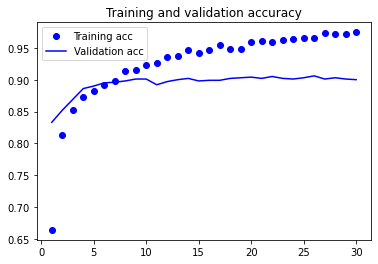

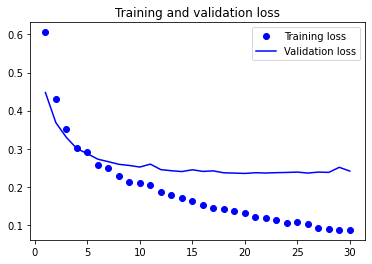

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We reach a validation accuracy of **90%** (vs 81% when we trained the convnet from scratch).

However, the plots above show a classic case of overfitting, eventhough we used a large dropout layer. 
This is because we are not using data sugmentaion and the dataset is relatively small.

### **Fast Feature Extraction With Data Augmentation**

Adding a densely connected classifier on top of the convolutional base

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


There are about 14.7 million parameters in the convoltional base: very large!

Before we compile and train the model, it’s very important to freeze the convolutional base. 

If we don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because
the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned.

With this setup, only the weights from the two Dense layers that you added will be trained. That’s a total of four weight tensors: two per layer (the main weight matrix and the bias vector).

In [ ]:
train_datagen = ImageDataGenerator(
                          rescale=1./255,
                          rotation_range=40,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                          train_dir,
                          target_size=(150, 150),
                          batch_size=20,
                          class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                          validation_dir,
                          target_size=(150, 150),
                          batch_size=20,
                          class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
              train_generator,
              steps_per_epoch=100,
              epochs=30,
              validation_data=validation_generator,
              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 12s 109ms/step - loss: 0.4159 - acc: 0.8005 - val_loss: 0.1719 - val_acc: 0.9290
Epoch 2/30
100/100 [==============================] - 12s 117ms/step - loss: 0.2466 - acc: 0.8985 - val_loss: 0.1510 - val_acc: 0.9420
Epoch 3/30
100/100 [==============================] - 11s 111ms/step - loss: 0.1964 - acc: 0.9180 - val_loss: 0.1370 - val_acc: 0.9410
Epoch 4/30
100/100 [==============================] - 11s 108ms/step - loss: 0.1620 - acc: 0.9355 - val_loss: 0.1204 - val_acc: 0.9530
Epoch 5/30
100/100 [==============================] - 10s 103ms/step - loss: 0.1507 - acc: 0.9385 - val_loss: 0.0897 - val_acc: 0.9650
Epoch 6/30
100/100 [==============================] - 10s 104ms/step - loss: 0.1303 - acc: 0.9485 - val_loss: 0.0910 - val_acc: 0.9680
Epoch 7/30
100/100 [==============================] - 10s 104ms/step - loss: 0.1005 - acc: 0.9615 - val_lo

Plotting the results during the training process:

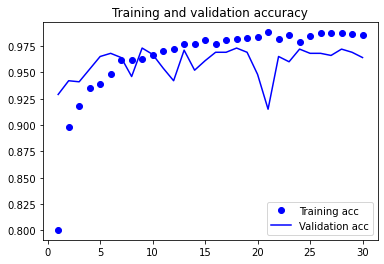

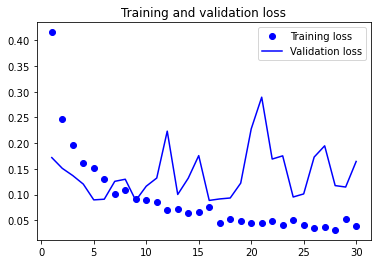

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We now get a validation accuracy of **96%** vs the 81% for the convnet trained from scratch, and the 90% for feature extraction without data augmentation.

## **Fine-Tuning**

Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers.

The steps for fine-tuning a model are as follows:


1.   Add our custom network on top of an already-trained base network.
2.   Freeze the base network.
3.   Train the part you added.
4.   Unfreeze some layers in the base network
5.   Jointly train both these layers and the part you added.


If the classifier isn't already trained, the error that wll be backpropagated in the initial epochs of gradient descent will be large, and the previously lerned representations will be lost.


The reason we only fine-tune the top layers of the convolutional base is that the earlier layers have representaions that are more generic and thus is very reusable.



We already completed the first three steps when doing feature extraction. Let’s proceed with step 4:

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

We’ll fine-tune the last three convolutional layers, which means all layers up to block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and
block5_conv3 should be trainable.

Freezing all layers up to a specific one:

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

Fine-tuning the model:

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/100
100/100 [==============================] - 12s 115ms/step - loss: 0.0085 - acc: 0.9970 - val_loss: 0.1685 - val_acc: 0.9740
Epoch 2/100
100/100 [==============================] - 13s 126ms/step - loss: 0.0143 - acc: 0.9950 - val_loss: 0.2451 - val_acc: 0.9680
Epoch 3/100
100/100 [==============================] - 11s 106ms/step - loss: 0.0148 - acc: 0.9960 - val_loss: 0.2039 - val_acc: 0.9720
Epoch 4/100
100/100 [==============================] - 11s 107ms/step - loss: 0.0070 - acc: 0.9975 - val_loss: 0.1649 - val_acc: 0.9780
Epoch 5/100
100/100 [==============================] - 11s 106ms/step - loss: 0.0214 - acc: 0.9925 - val_loss: 0.1783 - val_acc: 0.9740
Epoch 6/100
100/100 [==============================] - 11s 109ms/step - loss: 0.0058 - acc: 0.9975 - val_loss: 0.1519 - val_acc: 0.9780
Epoch 7/100
100/100 [==============================] - 11s 109ms/step - loss: 0.0046 - acc: 0.9995 - val_loss: 0.1694 - val_acc: 0.9790
Epoch 8/100
100/100 [===========================

Plotting the results during the training process:

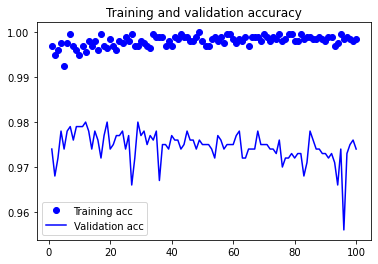

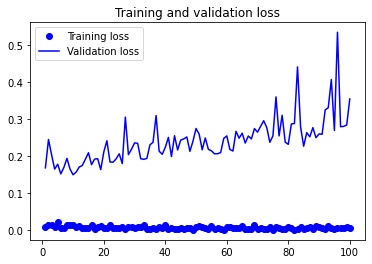

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Evaluating the final model on the test set:

In [ ]:
test_generator = test_datagen.flow_from_directory(
          test_dir,
          target_size=(150, 150),
          batch_size=20,
          class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9710000157356262


/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_gpu_aditr.kernel.aditr.1836721356237.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/keras/engine/training.py:2010: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


## We finally get an accuracy of **97%**

#***Visualizing What Convnets Learn***

##**Visualizing Intermediate Activations**

Visualizing intermediate activations consists of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input, the output of a layer is often called its activation, the output of the activation function.

This give a view into how the input to a layer is decomposed by various filters in that layer.

Each layer has a filter map, which have 3 dimensions: width, height, and depth (channels).

Each channel is one filter, we want to visualize this filter.

In short, each layer will have *depth#* filters.

Let us start by loading the model, that we trained  from scratch and which gave us an validation accuracy of 81%.

In [ ]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

Next we will get some random image that we did not use to train the model.

##### Preprocessing a single image:

In [ ]:
cat_image_path = '/tmp/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

def process_and_get_image_tensor(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  return img_tensor

cat_image_tensor = process_and_get_image_tensor(cat_image_path)
print('Image tensor shape is: ', cat_image_tensor.shape)

Image tensor shape is:  (1, 150, 150, 3)


##### Displaying the test picture:

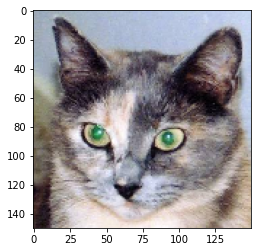

In [ ]:
plt.imshow(cat_image_tensor[0])
plt.show()

#### Extracting the feature maps

In order to extract the feature maps we want to look at, we’ll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. 

To do this, we’ll use the Keras class Model. 

In [ ]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]                    # Extracts the outputs of the top eight layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)      # Creates a model that will return these outputs, given the model input

The activation_model, will give us back 8 outputs given 1 input. There is an output for each activation layer.

In [ ]:
# Running the model in predict mode on a cat image
cat_image_activations = activation_model.predict(cat_image_tensor)      # Returns a list of 8 Numpy arrays 

For instance, this is the activation of the first convolution layer for the image input:

In [ ]:
first_layer_cat_activation = cat_image_activations[0]
print(first_layer_cat_activation.shape)

(1, 148, 148, 32)


It’s a 148 × 148 feature map with 32 channels. Let’s try plotting the fourth channel of the activation of the first layer of the original model:

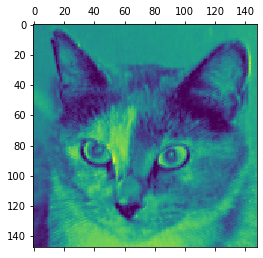

In [ ]:
# Visualizing the fourth channel
plt.matshow(first_layer_cat_activation[0, :, :, 4], cmap='viridis')

This channel/filter apperars to encode a edge detector.

Let us now plot a complete visualization of all the activations and all the filters in each layer:

In [ ]:
def visualize_layer_activations(model, activations):
  # Visualizing every channel in every intermediate activation
  layer_names = []
  for layer in model.layers[:8]:
    layer_names.append(layer.name)

  images_per_row = 16

  for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]     # The  no. of features/filters/channels in the the layer

    size = layer_activation.shape[1]            # The feature map has shape (1, size, size, n_features).

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
      for row in range(images_per_row):
        channel_image = layer_activation[0,:, :,col * images_per_row + row]
        # Post procss the feature to make it visulally palatable
        channel_image -= channel_image.mean() 
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

#### Cat image 1700 activations:

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_gpu_aditr.kernel.aditr.1836721356237.14b334fb3717c109/mount/server/ml_notebook:22: RuntimeWarning: invalid value encountered in true_divide


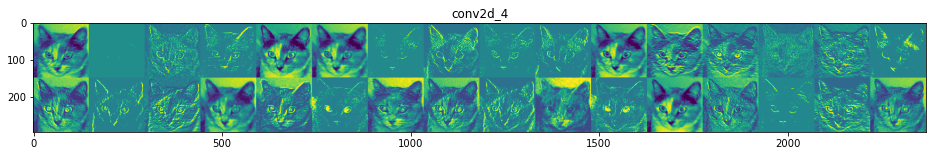

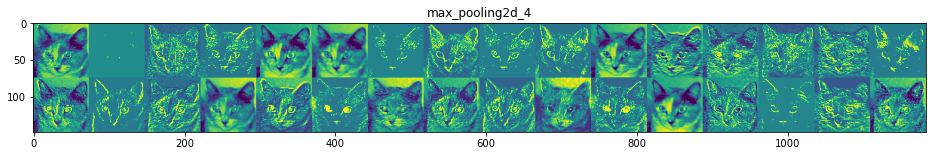

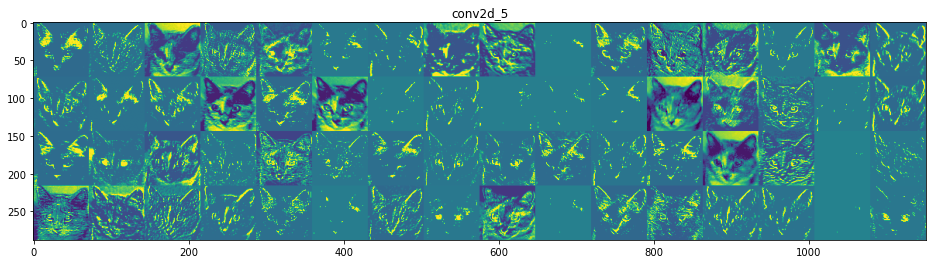

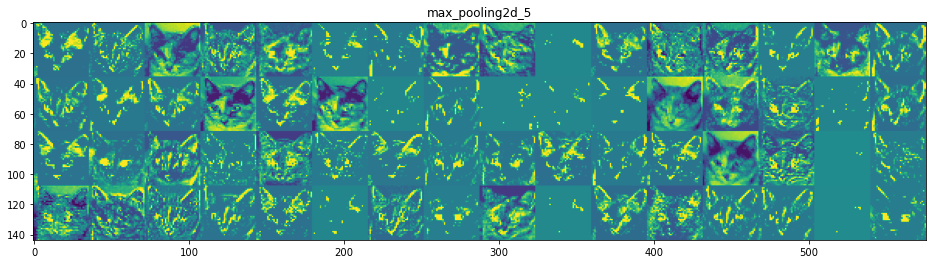

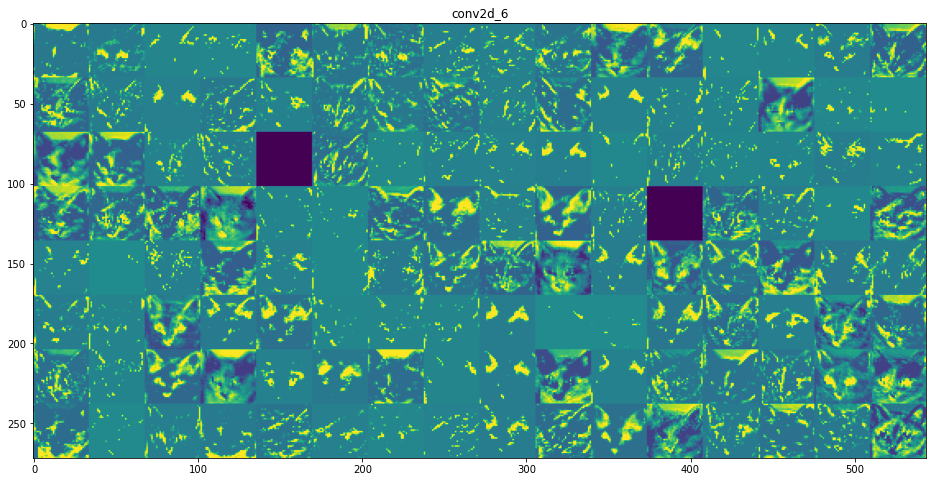

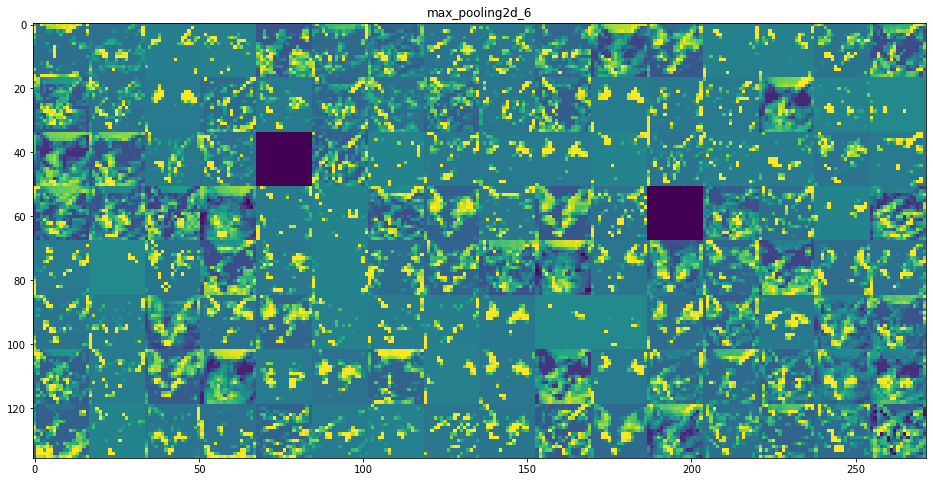

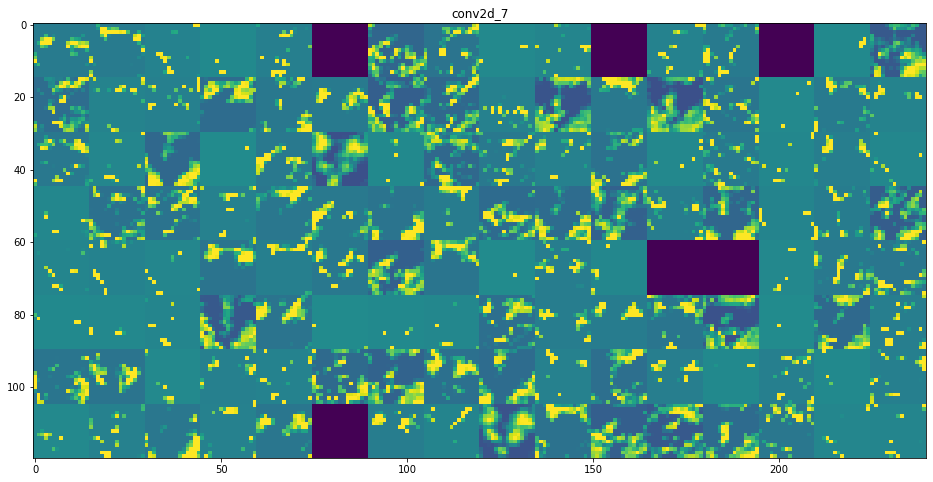

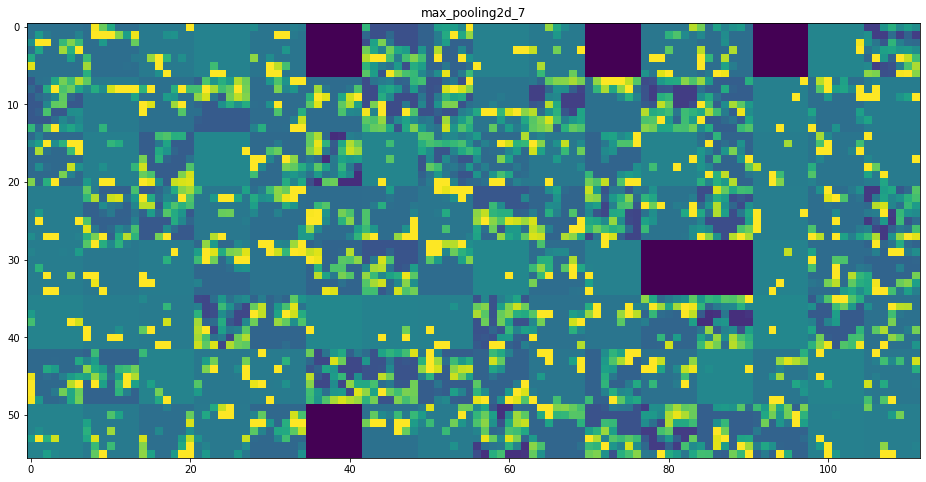

In [ ]:
visualize_layer_activations(model, cat_image_activations)

#### Dog image 1800 activations:

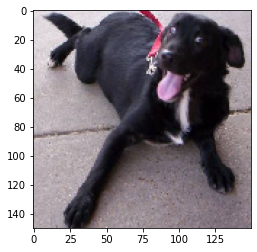

In [ ]:
dog_image_path = '/tmp/cats_and_dogs_small/test/dogs/dog.1700.jpg'
dog_image_tensor = process_and_get_image_tensor(dog_image_path)
plt.imshow(dog_image_tensor[0])
plt.show()

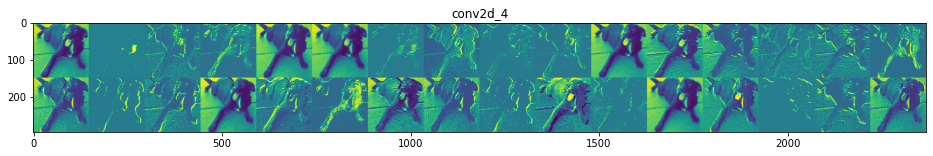

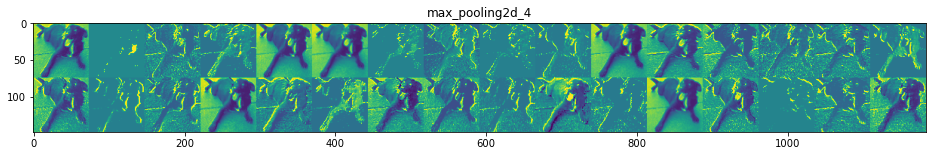

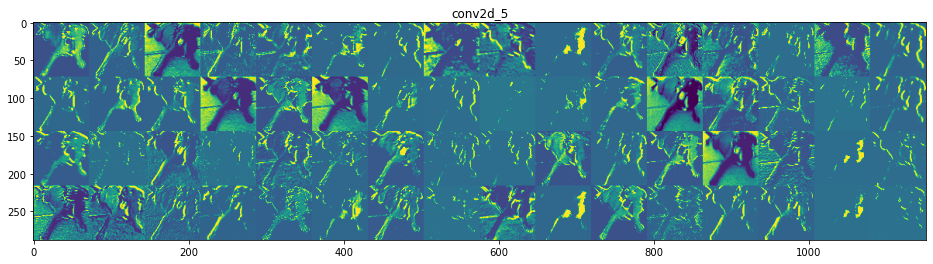

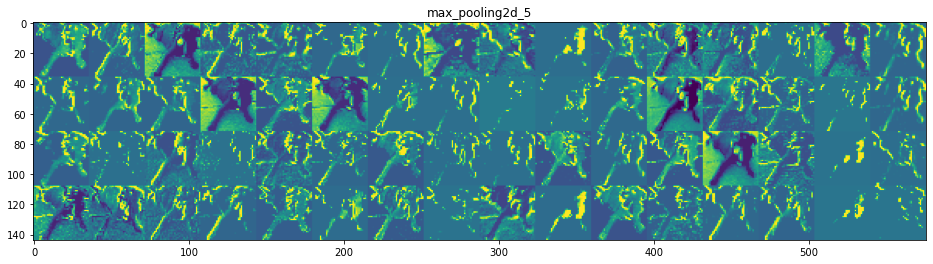

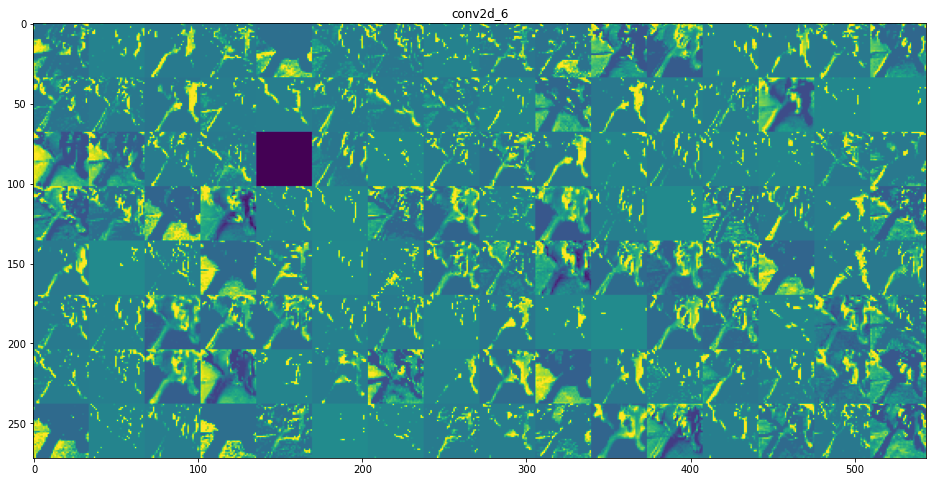

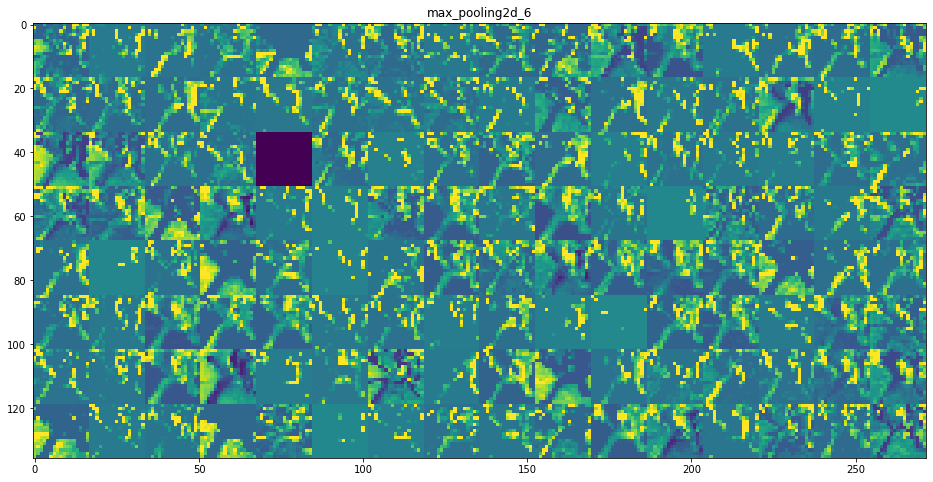

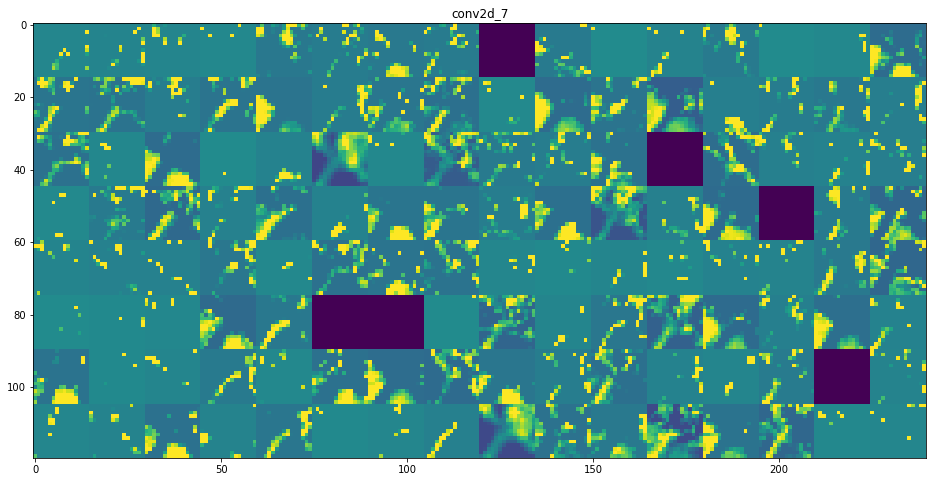

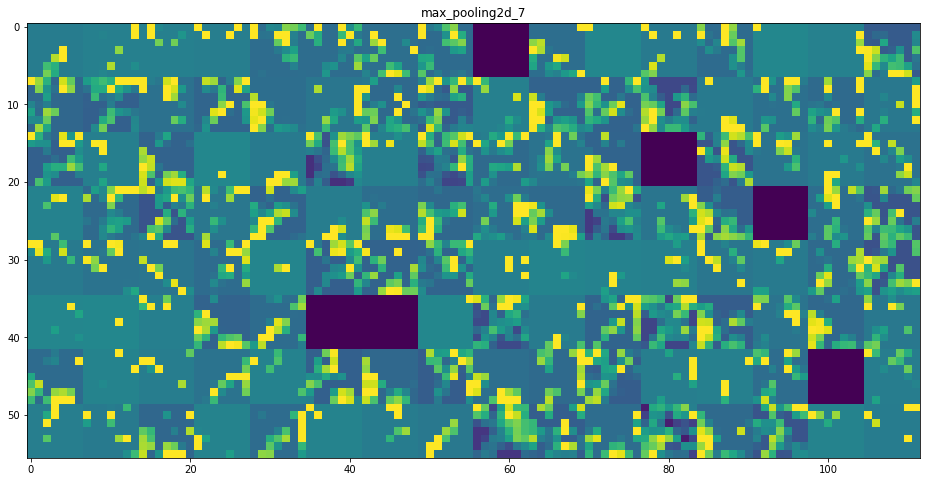

In [ ]:
dog_image_activations = activation_model.predict(dog_image_tensor)
visualize_layer_activations(model, dog_image_activations)

Observations:

*   The first layer acts as a collection of various edge detectors. At that stage, the activations retain almost all of the information present in the initial picture.


*   As we go higher, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as “cat ear” and dog eye.” Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.


*   The sparsity of the activations increases with the depth of the layer: in the first layer, all filters are activated by the input image; but in the following layers, more and more filters are blank. This means the pattern encoded by the filter isn’t found in the input image.



The activations of higher layers carry less and less information about the specific input being seen, and more and more information about the target (in this case, the class of the image: cat or dog). 

A deep neural network effectively acts as an information distillation pipeline, with raw data going in
(in this case, RGB pictures) and being repeatedly transformed so that irrelevant information is filtered out (for example, the specific visual appearance of the image), and useful information is magnified and refined (for example, the class of the image).

 This is analogous to the way humans and animals perceive the world: after observing a scene for a few seconds, a human can remember which abstract objects were present in it (bicycle, tree) but can’t remember the specific appearance of these objects. 

##**Visualizing Convnet Filters**

Another easy way to inspect the filters learned by convnets is to display the visual pattern that each filter is meant to respond to. 

This can be done with gradient ascent in input space: applying gradient descent to the value of the input image of a convnet so as to maximize the response of a specific filter, starting from a blank input image. The resulting input image will be one that the chosen filter is maximally responsive to

The process is simple: we’ll build a loss function that maximizes the value of a given filter in a given convolution layer, and then we’ll use stochastic gradient descent to adjust the values of the input image so as to maximize this activation value.

Let's use the VGG16 network

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

vgg16_model = VGG16(weights='imagenet',
              include_top=False)

In [ ]:
# Utility function to convert a tensor into a valid image
def deprocess_image(x):
  # Normalize the tensor: centers on 0, ensures std is 0.1
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1

  # Clips to the [0, 1] interval
  x += 0.5
  x = np.clip(x, 0, 1)

  # Converts to an RGB array
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [ ]:
#tf.compat.v1.disable_eager_execution()

# Function to generate filter visualizations
def generate_pattern(model, layer_name, filter_index, size=150):
  # Build a loss function that maximizes the activation of the
  # nth filter of the layer under consideration
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])

  # Compute the gradient of the input picture wrt the lost
  grads = K.gradients(loss, model.input)[0]
  # Normalize the gradient
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

  # Get the loss and grad give the input picture
  iterate = K.function([model.input], [loss, grads])
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

  # Run gradient ascent for 40 steps
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

  img = input_img_data[0]
  return deprocess_image(img)

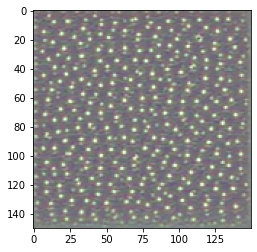

In [ ]:
plt.imshow(generate_pattern(vgg16_model, 'block3_conv1', 0))

It seems that filter 0 in layer block3_conv1 is responsive to a polka-dot pattern

Let us start visualizing every filter in every layer. 

For ease, we will look  at the first 64 filters in each layer, and you’ll only look at the first layer of each convolution block block1_conv1, block2_conv1, block3_conv1, block4_conv1, block5_conv1). You’ll arrange the outputs on an 8 × 8 grid of 64 × 64 filter patterns, with some black margins between each filter pattern 

In [ ]:
# Generating a grid of all filter response patterns in a layer
def generate_grid_of_filter_responses(model, layer_name, num_of_filter_responses=8,filter_respose_size=64, margin=5):
  results = np.zeros((8 * filter_respose_size+7* margin, 8 * filter_respose_size+7* margin, 3))   # Black image

  for row in range(num_of_filter_responses):
    for col in range(num_of_filter_responses):
      filter_img = generate_pattern(model, layer_name, row + (col * 8), size=filter_respose_size)

      horizontal_start = row * filter_respose_size + row * margin
      horizontal_end = horizontal_start + filter_respose_size
      vertical_start = col * filter_respose_size + col * margin
      vertical_end = vertical_start + filter_respose_size

      results[horizontal_start: horizontal_end,
              vertical_start: vertical_end, :] = filter_img

  plt.title(layer_name)
  plt.figure(figsize=(20, 20))
  plt.imshow(results)

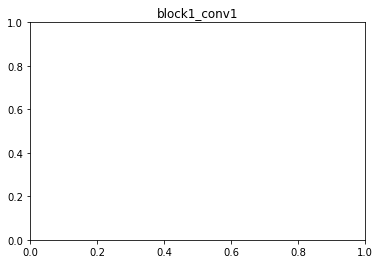

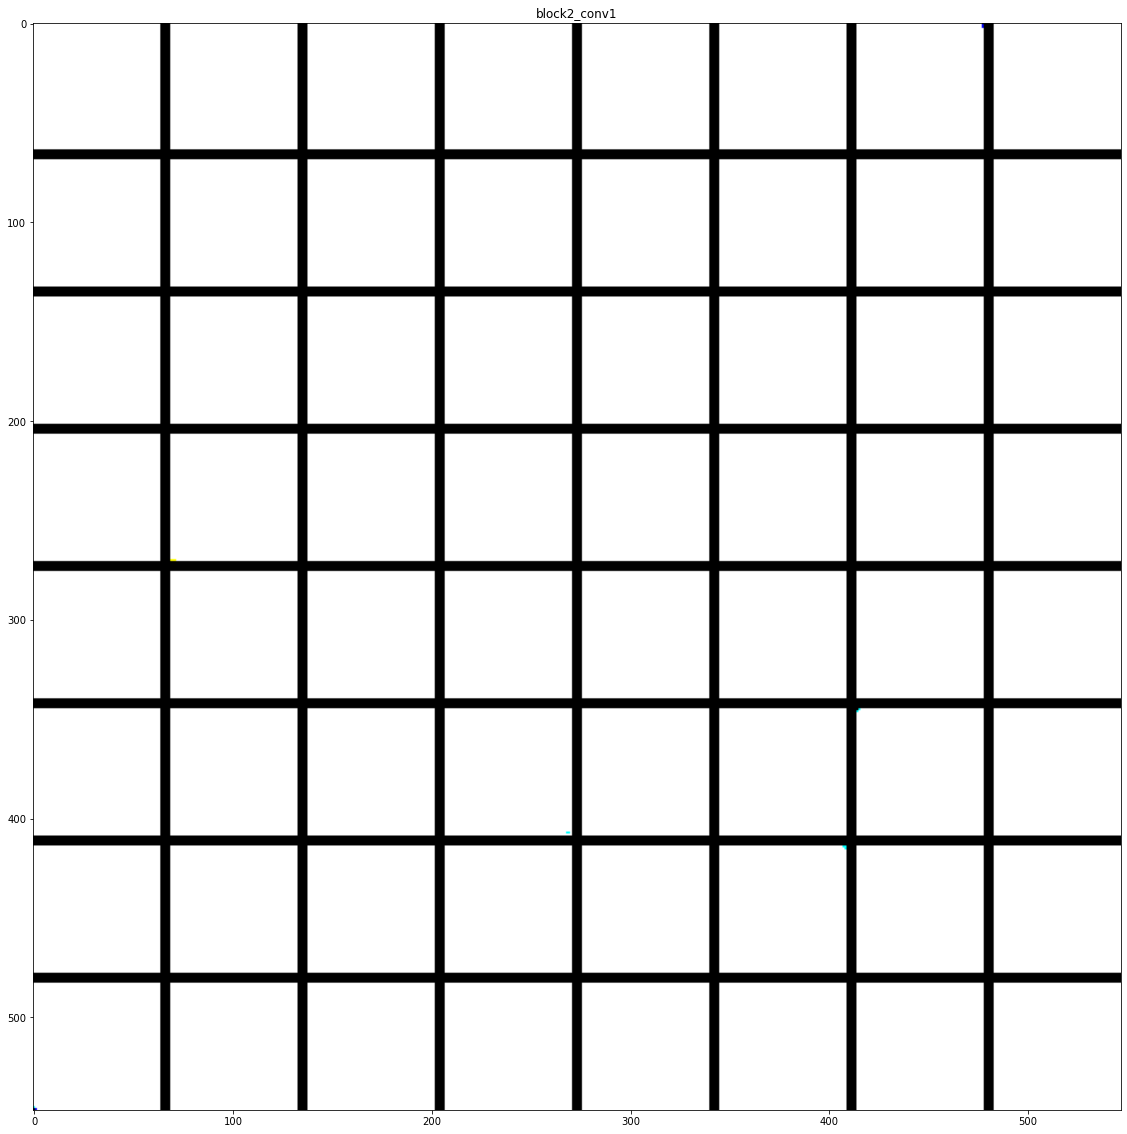

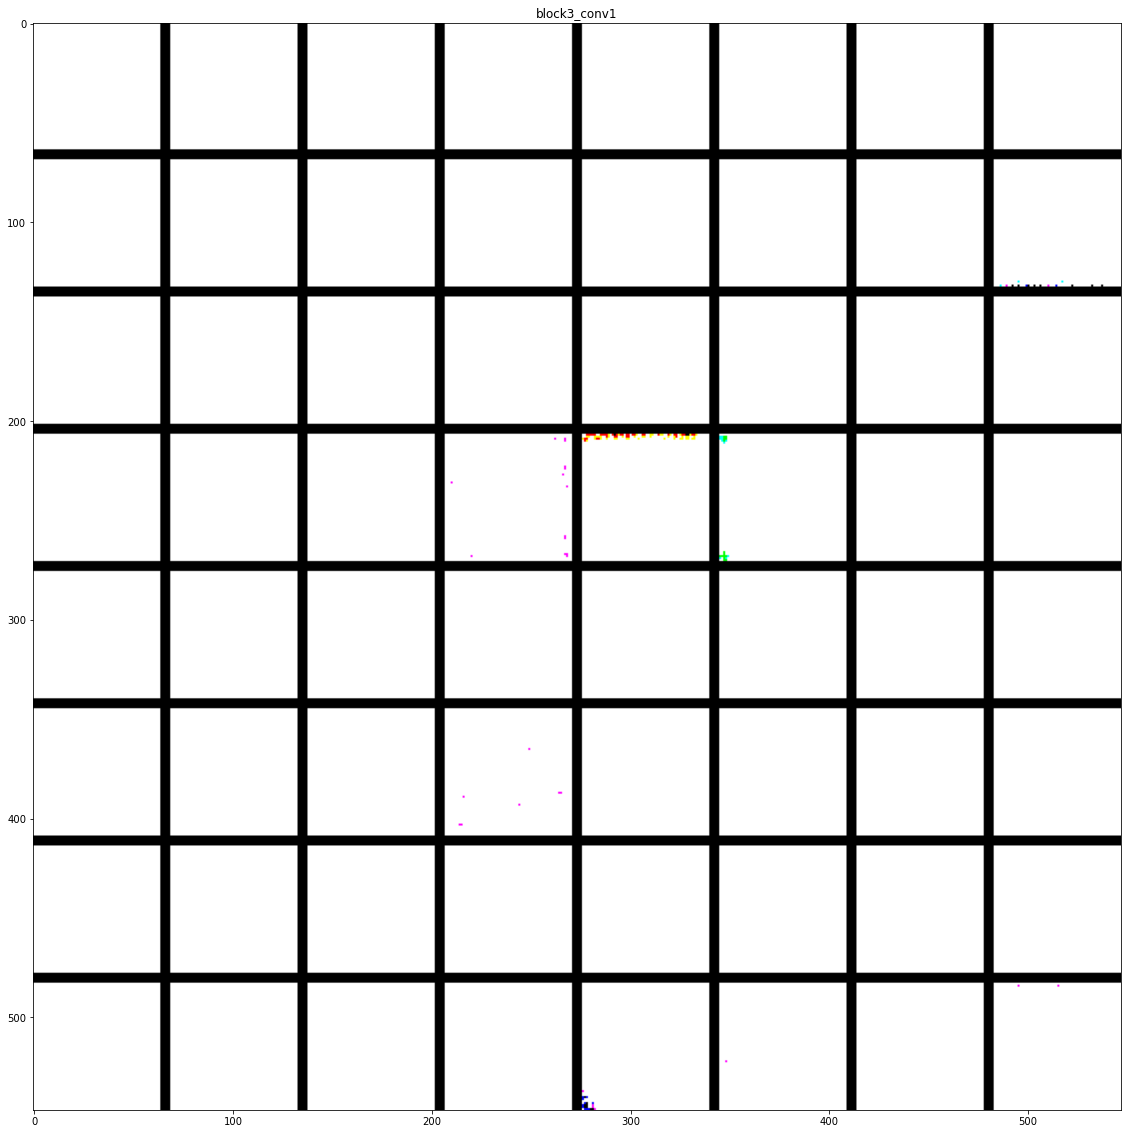

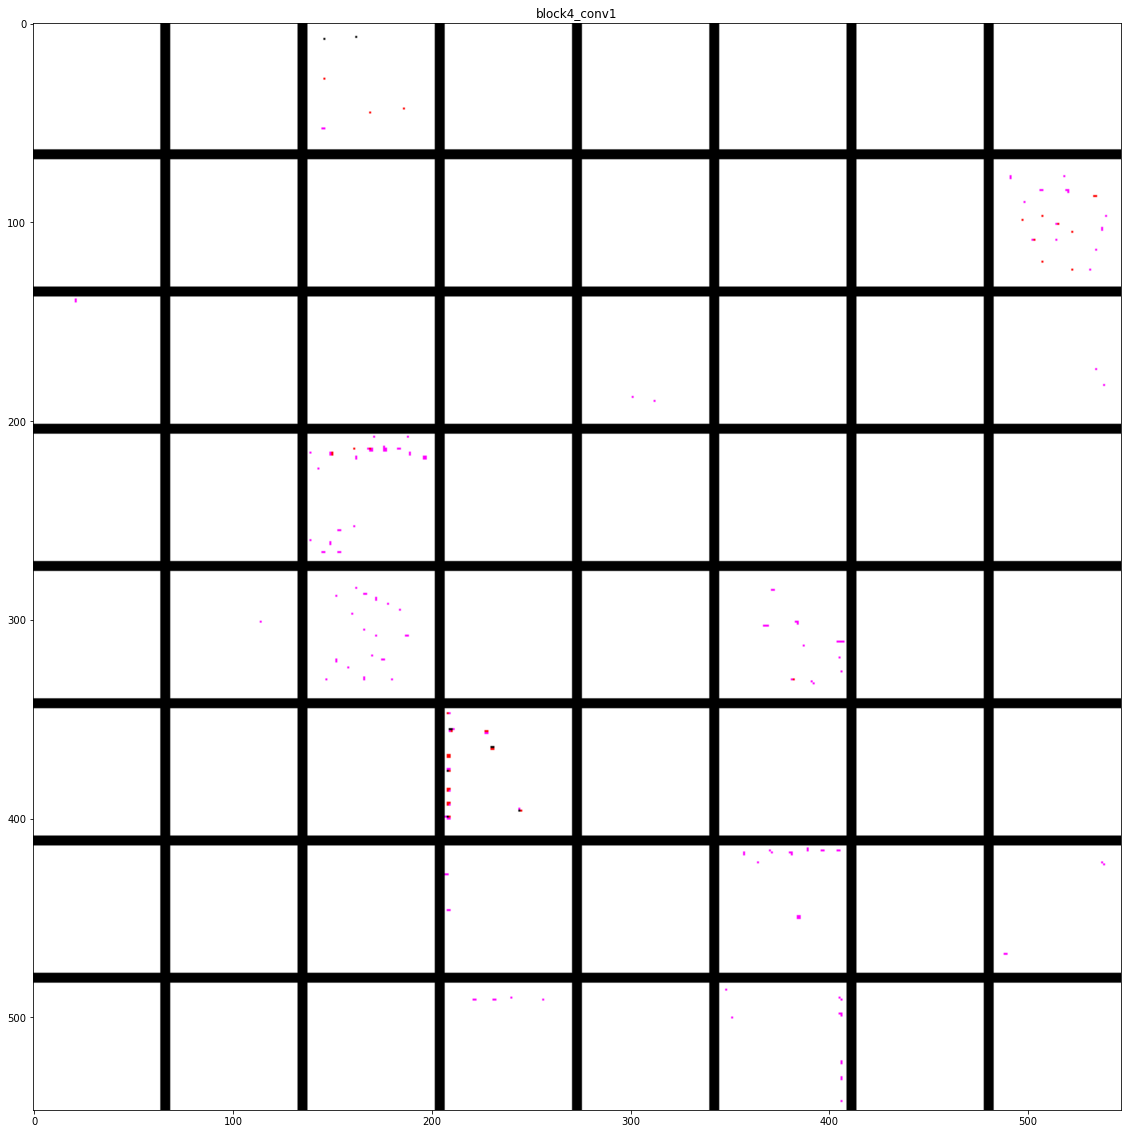

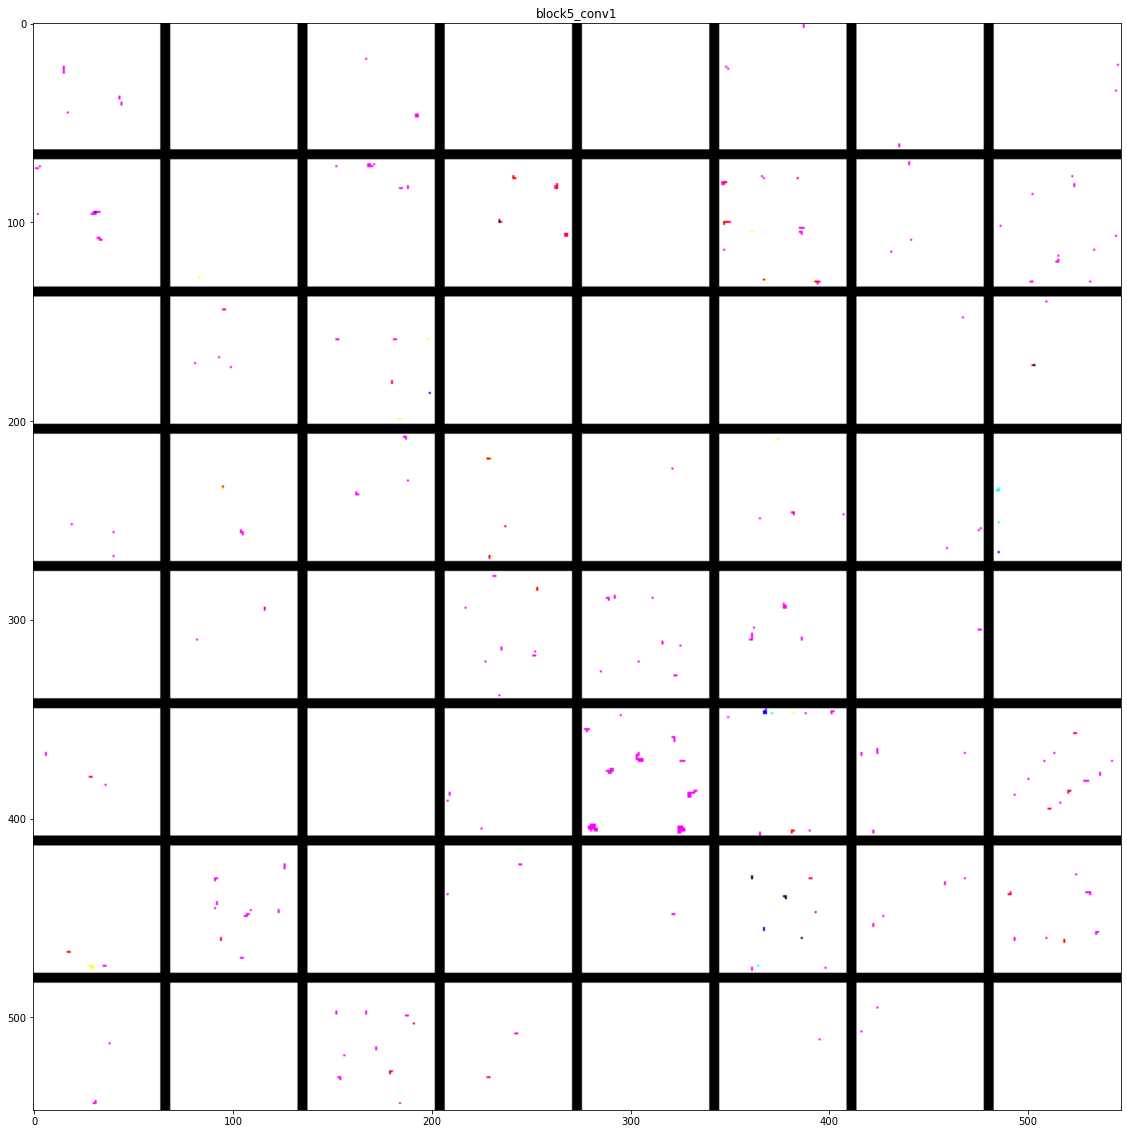

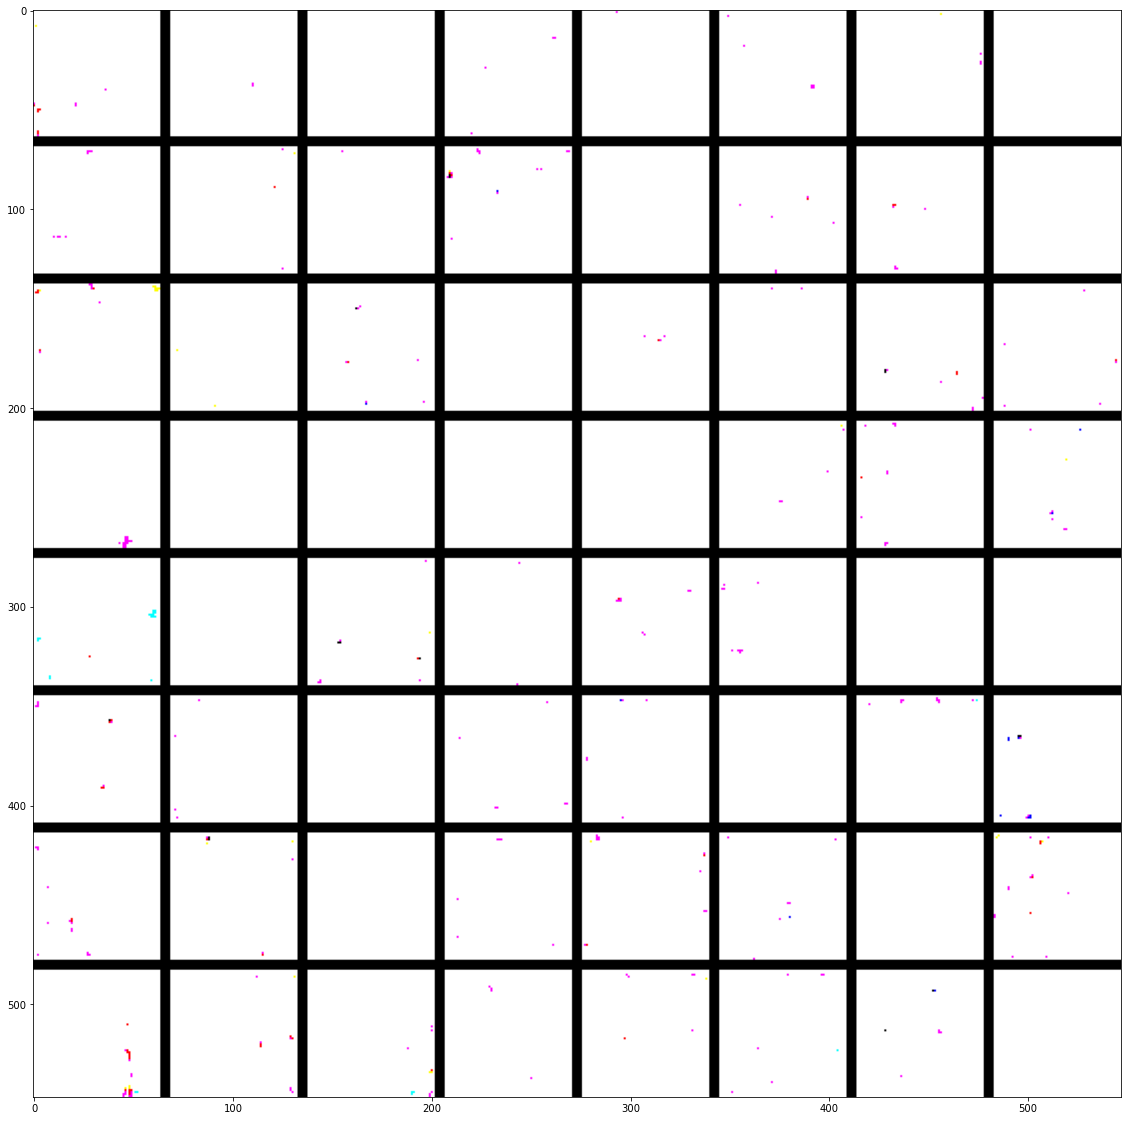

In [ ]:
vgg16_layer_names = ("block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1")
for layer_name in vgg16_layer_names:
  generate_grid_of_filter_responses(vgg16_model, layer_name)

In [ ]:
layer_name = 'block1_conv1'
size = 64
margin = 5
results = np.zeros((8 * size+7* margin, 8 * size+7* margin, 3))
for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(vgg16_model, layer_name, i + (j * 8), size=size)
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start: horizontal_end,
    vertical_start: vertical_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results)

##**Visualizing Heatmaps of Class Activation**

This technique is useful for understanding which parts of a convnet led to a final classification decision.

This general category of techniques is called class activation map (CAM) visualization, and it consists of producing heatmaps of class activation over input images. A class activation heatmap is a 2D grid of scores associated with a specific output class, computed for every location in any input image, indicating how important each location is with respect to the class under consideration. 

For example, given an image fed into a dogs-vs-cats convnet, CAM visualizations allow us to generate a heatmap for the class "cat", showing us how cat-like different parts of the image are, and also a heatmap for the class "dog", indicating how dog-like different parts of the image are.

We'll use the implementaion described in “*Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization.*”

It consists of taking the output feature map of a convolution layer, given an input image, and weighing every channel/filter in that filter map by the gradient of the class w.r.t. the channel.

Intuition: We're weighing a spatial map of *how intensely the input image activates differnt channels* by *how important each channel is with regard to the class* resulting in a spatial map of ***how intensely the input image activates the class***.

We'll use the VGG16 model again:

In [ ]:
# Loading the VGG16 network with pretrained weights
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 4s 0us/step


Conside this image of African elephants in Kenya:


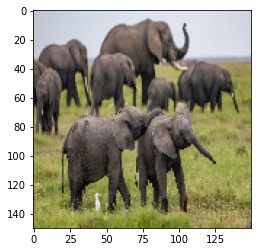

In [ ]:
gfile.Copy('/x20/users/ad/aditr/elephants.jpg', '/tmp/kenya_elephant.jpg')
elephants_image_tensor = process_and_get_image_tensor('/tmp/kenya_elephant.jpg')
plt.imshow(elephants_image_tensor[0])
plt.show()

Let’s convert this image into something the VGG16 model can read: the model was trained on images of size 224 × 244

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

def process_input_image_for_vgg16(img_path):
  img = image.load_img(img_path, target_size=(224, 224))  # Python Imaging Library image of size 224 x 224
  x = image.img_to_array(img)                             # float32 Numpy array of shape (224, 224, 3)
  x = np.expand_dims(x, axis=0)                           # Add a dimension to transform it to (1, 224, 224, 3)
  x = preprocess_input(x)                                 # Preprocesses the batch, this does channel-wise normalization
  return x

In [ ]:
img_path = '/tmp/kenya_elephant.jpg'
x = process_input_image_for_vgg16(img_path)

We can now run the pretrained network on the image and decode its prediction vector back to a human-readable format:

In [ ]:
preds = model.predict(x)
print('Predicted:\n', decode_predictions(preds, top=3)[0])

Predicted:
 [('n02504458', 'African_elephant', 0.8374094), ('n01871265', 'tusker', 0.12558655), ('n02504013', 'Indian_elephant', 0.036999114)]


It predicts the class is African elephants with a confidence of 83.7%

The entry in the prediction vector that was maximally activated is
the one corresponding to the “African elephant” class, at index 386:

In [ ]:
np.argmax(preds[0])

386

In [ ]:
print('The shape of preds is: ', preds.shape)

The shape of preds is:  (1, 1000)


This shows there are 1000 different classes that the VGG16 model can predict.

To visualize which parts of the image are the most African elephant–like, let’s set up the Grad-CAM process.

In [ ]:
# Setting up the Grad-CAM algorithm
african_elephant_vgg16_output = model.output[:, 386]  # "African elephant" entry in the prediction vector

last_conv_layer = model.get_layer('block5_conv3')     # Output feature map of the block5_conv3 layer, the last convolutional layer in VGG16

grads = K.gradients(african_elephant_vgg16_output, last_conv_layer.output)[0] # Gradient of the “African elephant” class 
                                                                              # with regard to the output feature map of block5_conv3
                                                                              # This give us how important each filter is to the
                                                                              # "African Elephant" class.

pooled_grads = K.mean(grads, axis=(0, 1, 2))  # Vector of shape (512,), where each entry is the mean intensity of the gradient 
                                              # over a specific feature-map channel

iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]]) # Lets you access the values of the quantities we just defined: 
                                                                # pooled_grads and 
                                                                # the output feature map of block5_conv3, given a sample image

pooled_grads_value, conv_layer_output_value = iterate([x])      # Values of these two quantities, as Numpy arrays,
                                                                # given the sample image of two elephants

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i] # Multiplies each channel in the feature-map array by 
                                                            # “how important this channel is” with regard to the “elephant” class
                                                            # This multiplication gives us:
                                                            # “how intensely the input image activates the class”

heatmap = np.mean(conv_layer_output_value, axis=-1) # The channel-wise mean of the resulting feature map is the heatmap of the class activation.

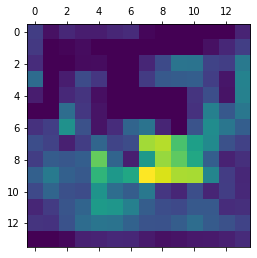

In [ ]:
# Heatmap post-processing
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

We’ll use OpenCV to generate an image that superimposes the original image on the heatmap we just obtained.

In [ ]:
!pip install cv2

/bin/sh: line 1: pip: command not found


In [ ]:
# Superimposing the heatmap with the original picture
from cvx2 import latest as cv2

img = cv2.imread(img_path)        # Use cv2 to load the original image

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0])) # Resize the heatmap to be the same size as the original image

heatmap = np.uint8(255 * heatmap)         # Converts the heatmap to RGB

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Applies the heatmap to the original image

superimposed_img = heatmap * 0.4 + img      # 0.4 is the heatmap intensity factor

cv2.imwrite('/tmp/elephant_cam.jpg', superimposed_img)   # Saves image to disk

gfile.Copy('/tmp/elephant_cam.jpg', '/x20/users/ad/aditr/elephants_cam.jpg')

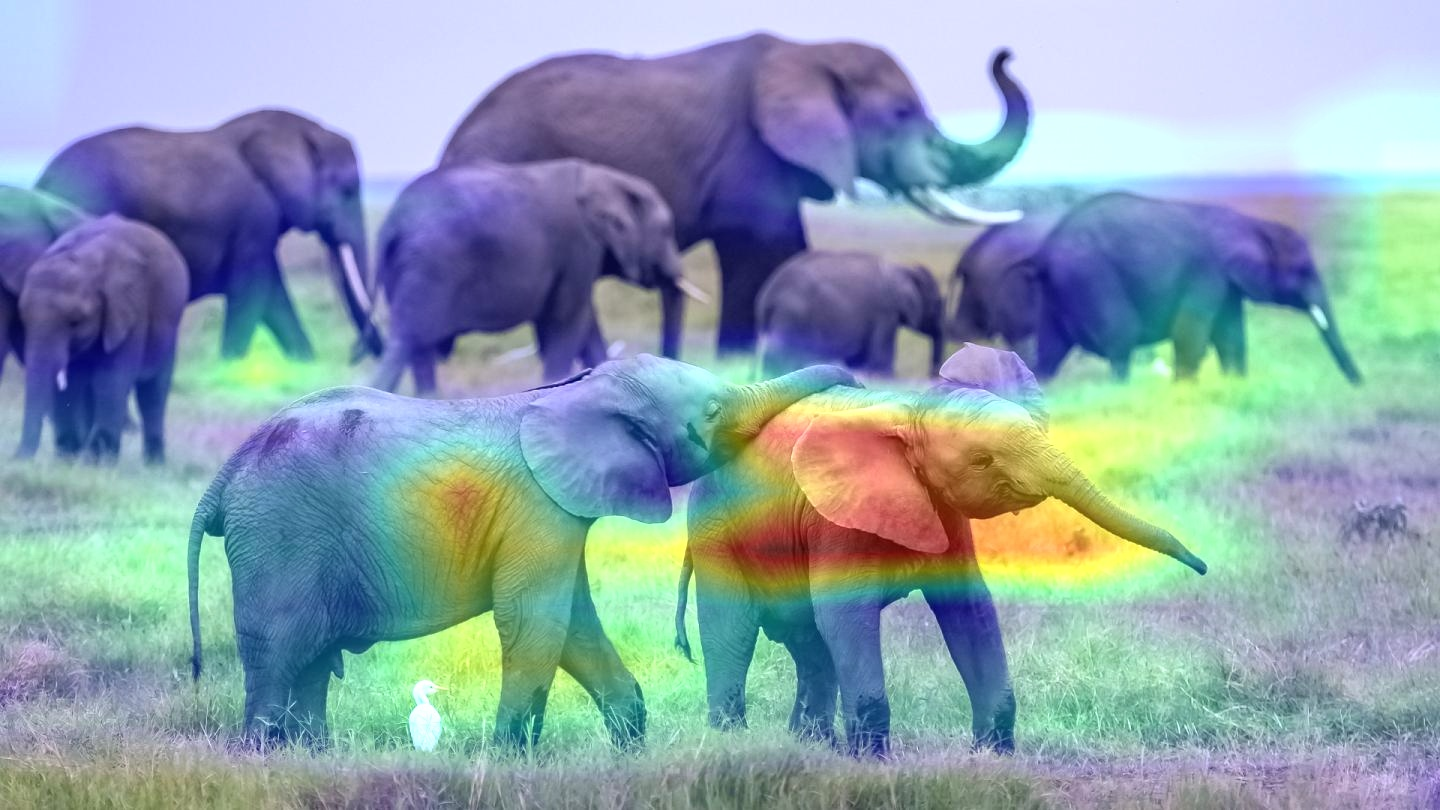

We can now answer:


*   Why the network thought this image contained an African elephant.
*   Where the African elephan is located in the picture.



Citation: Deep Learning With Python by Francois Chollet